In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('candy-data.csv')

### Information on the variables

1. chocolate | Does it contain chocolate?
2. fruity | Is it fruit flavored?
3. caramel | Is there caramel in the candy?
4. peanutalmondy | Does it contain peanuts, peanut butter or almonds?
5. nougat | Does it contain nougat?
6. crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
7. hard | Is it a hard candy?
8. bar | Is it a candy bar?
9. pluribus | Is it one of many candies in a bag or box?
10. sugarpercent | The percentile of sugar it falls under within the data set.
11. pricepercent | The unit price percentile compared to the rest of the set.
12. winpercent | The overall win percentage according to 269,000 matchups.

For binary variables, 1 means yes, 0 means no.

In [4]:
df.shape

(85, 13)

In [5]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


## EDA

Exploring visually how the different candies compare according to the contents. <br>
Which candy is more likely to win a matchup against its competitors based on its contents?

0    48
1    37
Name: chocolate, dtype: int64


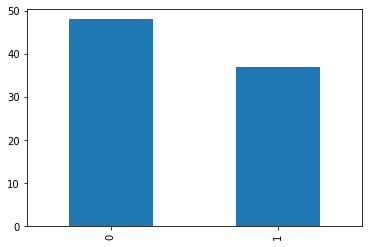

In [8]:
#How many candies contain chocolate?
df['chocolate'].value_counts().plot(kind= 'bar')
print(df['chocolate'].value_counts())

0    47
1    38
Name: fruity, dtype: int64


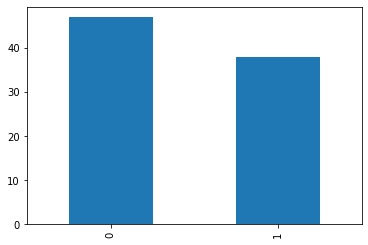

In [9]:
#How many candies contain a fruity element?
df['fruity'].value_counts().plot(kind= 'bar')
print(df['fruity'].value_counts())

0    78
1     7
Name: nougat, dtype: int64


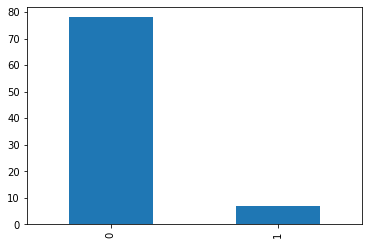

In [10]:
#How many candies contain nougat?
df['nougat'].value_counts().plot(kind= 'bar')
print(df['nougat'].value_counts())

0    71
1    14
Name: peanutyalmondy, dtype: int64


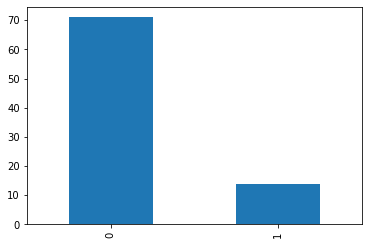

In [11]:
#How mmany candies contrain peanutyalmondy element?
df['peanutyalmondy'].value_counts().plot(kind= 'bar')
print(df['peanutyalmondy'].value_counts())


0    78
1     7
Name: crispedricewafer, dtype: int64


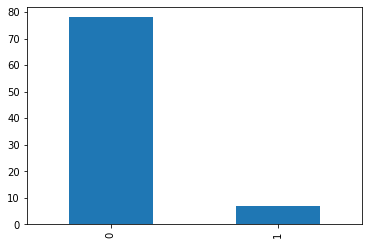

In [12]:
#How many candies contain crispedricewafer?
df['crispedricewafer'].value_counts().plot(kind= 'bar')
print(df['crispedricewafer'].value_counts())


0    70
1    15
Name: hard, dtype: int64


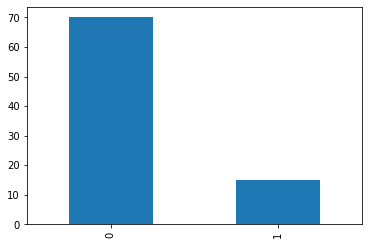

In [13]:
#How many candies are hard?
df['hard'].value_counts().plot(kind= 'bar')
print(df['hard'].value_counts())

0    64
1    21
Name: bar, dtype: int64


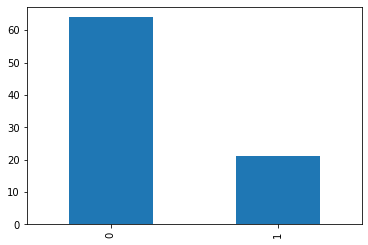

In [14]:
#How many candies contain bars?
df['bar'].value_counts().plot(kind= 'bar')
print(df['bar'].value_counts())

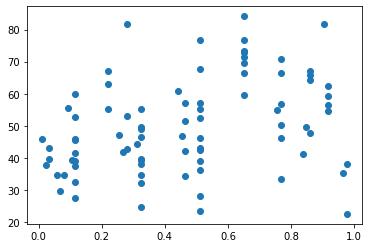

In [15]:
plt.scatter(x = 'pricepercent', y ='winpercent', data= df, )